Class Index: 12
Class: dog, Part: head
Class: dog, Part: rear
Class: dog, Part: muzzle
Class: dog, Part: torso
Class: dog, Part: neck
Class: dog, Part: lfleg
Class: dog, Part: lfpa
Class: dog, Part: rfleg
Class: dog, Part: rfpa
Class: dog, Part: lbleg
Class: dog, Part: lbpa
Class: dog, Part: rbleg
Class: dog, Part: rbpa
Class: dog, Part: tail


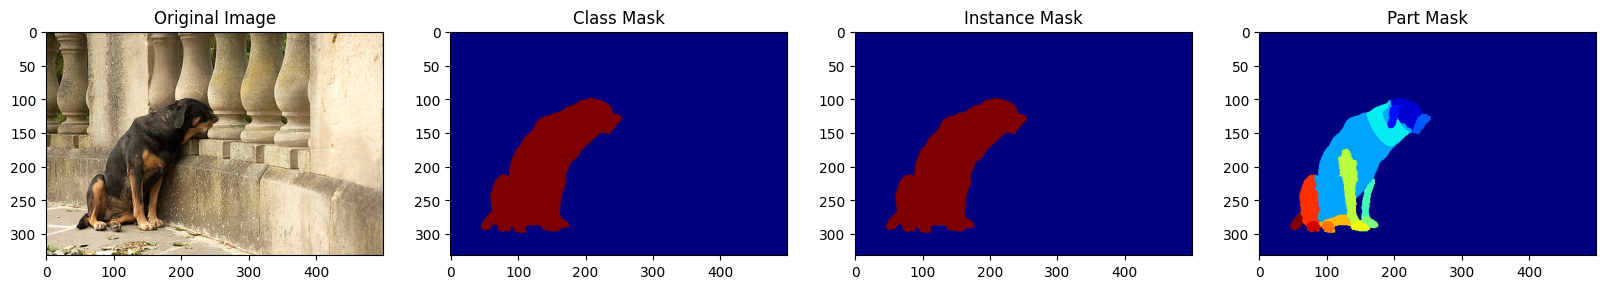

In [2]:
import os
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from PIL import Image

# Paths to the dataset
annotations_path = "/data/VLMGroundingProject/Datasets/PascalPart/Annotations_Part"
images_path = "/data/VLMGroundingProject/Datasets/Pascal_VOC_2012/VOCdevkit/VOC2012/JPEGImages"  

def load_annotation(annot_file_name, annotations_path):
    """Load the .mat annotation file."""
    mat_data = scipy.io.loadmat(os.path.join(annotations_path, annot_file_name))
    return mat_data['anno']

def visualize_example(annot_file_name, annotations_path, images_path):
    """Visualize an example image and its segmentation masks."""
    # Load annotation
    anno = load_annotation(annot_file_name, annotations_path)
    
    # Extract objects
    objects = anno[0][0]['objects'][0]
    
    # Load image
    img_file = os.path.splitext(annot_file_name)[0] + ".jpg"
    img = Image.open(os.path.join(images_path, img_file))
    
    # Create masks
    img_array = np.array(img)
    cls_mask = np.zeros(img_array.shape[:2], dtype=np.uint8)
    inst_mask = np.zeros(img_array.shape[:2], dtype=np.uint8)
    part_mask = np.zeros(img_array.shape[:2], dtype=np.uint8)
    
    for obj_idx, obj in enumerate(objects):
        class_ind = obj['class_ind'][0][0]
        print(f"Class Index: {class_ind}")
        class_name = obj['class'][0]
        silh = obj['mask']
        cls_mask[silh > 0] = class_ind
        inst_mask[silh > 0] = obj_idx + 1
        
        # Extract parts
        parts = obj['parts'][0]
        for i, part in enumerate(parts):
            part_name = part['part_name'][0]
            print(f"Class: {class_name}, Part: {part_name}")
            part_mask_data = part['mask']
            part_mask[part_mask_data > 0] = i+1  # Assign a value for visualization
    
    # Plot the image and masks
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    axes[0].imshow(img)
    axes[0].set_title("Original Image")
    axes[1].imshow(cls_mask, cmap='jet')
    axes[1].set_title("Class Mask")
    axes[2].imshow(inst_mask, cmap='jet')
    axes[2].set_title("Instance Mask")
    axes[3].imshow(part_mask, cmap='jet')
    axes[3].set_title("Part Mask")
    plt.show()

# Example usage
visualize_example("2008_006908.mat", annotations_path, images_path)

In [3]:
def get_pascalpart_masks(annot_file_name, annotations_path, images_path):
    """
    Return the segmentation masks for a single image from an annotation .m file
    """
    # Load annotation
    anno = load_annotation(annot_file_name, annotations_path)
    
    # Extract objects
    objects = anno[0][0]['objects'][0]
    
    # Load image
    img_file = os.path.splitext(annot_file_name)[0] + ".jpg"
    img = Image.open(os.path.join(images_path, img_file))
    
    # Dictionary to hold object and part masks
    img_array = np.array(img)
    """
    {
        'class_name':
        {
            'object_maps': [list of maps] # Ideally, we expect one class to be present only once, but it could be present multiple times. So we keep a list of segmentation masks 
            'parts': 
            {
                'part_name': [list of maps] # Once again, ideal expectation is one unique part per image, but we keep list of maps in case one part is present multiple times
            }
        }
    }
    """

    anno_dict = {}
    
    for obj_idx, obj in enumerate(objects): # You can have the same class multiple time in objects
        class_ind = obj['class_ind'][0][0]
        # print(f"Class Index: {class_ind}")
        class_name = obj['class'][0]
        class_mask = obj['mask']

        if class_name not in anno_dict:
            anno_dict[class_name] = {'object_maps': []}
        anno_dict[class_name]['object_maps'].append(class_mask)
        
        # Extract parts
        anno_dict[class_name]['parts'] = {}
        parts = obj['parts'][0]
        for i, part in enumerate(parts):
            part_name = part['part_name'][0]
            # print(f"Class: {class_name}, Part: {part_name}")
            part_mask_data = part['mask']
            if part_name not in anno_dict[class_name]['parts']:
                anno_dict[class_name]['parts'][part_name] = []
            anno_dict[class_name]['parts'][part_name].append(part_mask_data)

    return anno_dict

In [4]:
anno_dict = get_pascalpart_masks("2008_000652.mat", annotations_path, images_path)

In [6]:
anno_dict.keys()

dict_keys([np.str_('person')])

In [7]:
anno_dict['person'].keys()

dict_keys(['object_maps', 'parts'])

In [8]:
anno_dict['person']['parts'].keys()

dict_keys([np.str_('head'), np.str_('lear'), np.str_('rear'), np.str_('leye'), np.str_('reye'), np.str_('mouth'), np.str_('nose'), np.str_('torso'), np.str_('neck'), np.str_('llarm'), np.str_('luarm'), np.str_('lhand'), np.str_('rlarm'), np.str_('ruarm'), np.str_('rhand'), np.str_('lfoot'), np.str_('rlleg'), np.str_('ruleg')])

In [14]:
len(anno_dict['person']['object_maps'])

1

In [15]:
anno_dict['person']['parts'].keys()

dict_keys([np.str_('head'), np.str_('lear'), np.str_('rear'), np.str_('leye'), np.str_('reye'), np.str_('mouth'), np.str_('nose'), np.str_('torso'), np.str_('neck'), np.str_('llarm'), np.str_('luarm'), np.str_('lhand'), np.str_('rlarm'), np.str_('ruarm'), np.str_('rhand'), np.str_('lfoot'), np.str_('rlleg'), np.str_('ruleg')])

In [16]:
anno_dict['person']['parts']['head'][0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(213, 320), dtype=uint8)

In [17]:
anno = load_annotation("2008_000652.mat", annotations_path)

In [18]:
anno

array([[(array(['2008_000652'], dtype='<U11'), array([[(array(['person'], dtype='<U6'), array([[15]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
                       [0, 0, 0, ..., 0, 0, 0],
                       [0, 0, 0, ..., 0, 0, 0],
                       ...,
                       [0, 0, 0, ..., 0, 0, 0],
                       [0, 0, 0, ..., 0, 0, 0],
                       [0, 0, 0, ..., 0, 0, 0]], shape=(213, 320), dtype=uint8), array([[(array(['head'], dtype='<U4'), array([[0, 0, 0, ..., 0, 0, 0],
                               [0, 0, 0, ..., 0, 0, 0],
                               [0, 0, 0, ..., 0, 0, 0],
                               ...,
                               [0, 0, 0, ..., 0, 0, 0],
                               [0, 0, 0, ..., 0, 0, 0],
                               [0, 0, 0, ..., 0, 0, 0]], shape=(213, 320), dtype=uint8)),
                        (array(['lear'], dtype='<U4'), array([[0, 0, 0, ..., 0, 0, 0],
                               [0, 0, 0, ..

In [9]:
def get_pascalpart_classes(annot_file_name, annotations_path):
    """
        Return just the class names for a single image from an annotation .m file.
        We want to get the object name and all parts asscociated with it.
        Dictionary that has object name as key and a list of parts as value
    """
    # Load annotation
    anno = load_annotation(annot_file_name, annotations_path)

    classes_dict = {}
    
    # Extract objects
    objects = anno[0][0]['objects'][0]
    
    for obj_idx, obj in enumerate(objects): 
        class_name = obj['class'][0]

        if class_name not in classes_dict:
            classes_dict[class_name] = set()
        # Extract parts
        parts = obj['parts'][0]
        for i, part in enumerate(parts):
            part_name = part['part_name'][0]
            classes_dict[class_name].add(part_name)
            
    return classes_dict
        

In [12]:
## Test the python script
import sys
sys.path.append('/home/ksmehrab/AttentionGrounding/Baselines/Datasets')

In [13]:
from pascalpart import get_pascalpart_masks, get_pascalpart_classes

In [21]:
annot_dict = get_pascalpart_masks(
    "2008_000811.mat", 
    annotations_path="/data/VLMGroundingProject/Datasets/PascalPart/Annotations_Part", 
    images_path="/data/VLMGroundingProject/Datasets/Pascal_VOC_2012/VOCdevkit/VOC2012/JPEGImages"  
)

In [23]:
annot_dict.keys()

dict_keys([np.str_('person'), np.str_('motorbike')])

In [26]:
annot_dict['motorbike']['parts'].keys()

dict_keys(['front wheel', 'back wheel', 'headlight'])

In [18]:
classes = get_pascalpart_classes(
    "2008_000652.mat", 
    annotations_path="/data/VLMGroundingProject/Datasets/PascalPart/Annotations_Part"
)

In [19]:
classes

{'person': ['right hand',
  'left hand',
  'left foot',
  'left lower arm',
  'right lower leg',
  'head',
  'nose',
  'right upper arm',
  'right lower arm',
  'right upper leg',
  'left ear',
  'left upper arm',
  'mouth',
  'torso',
  'right ear',
  'left eye',
  'right eye',
  'neck']}

## Check that all val images have annotation

In [25]:
import os

def read_txt_file(file_path):
    with open(file_path, 'r') as f:
        lines = f.readlines()
    lines = [line.strip() for line in lines]
    while lines[-1] == '':
        lines = lines[:-1]
    return lines


pascal_image_dir = "/data/Pascal_VOC_2012/VOCdevkit/VOC2012/JPEGImages" # 17125 images
pascal_val_file_path = "/data/Pascal_VOC_2012/VOCdevkit/VOC2012/ImageSets/Segmentation/val.txt"
pascal_val_filenames = read_txt_file(pascal_val_file_path) # 1449 images
pascal_val_filenames = [ x+".jpg" for x in pascal_val_filenames]

In [26]:
# see pascal train
pascal_train_file_path = "/data/Pascal_VOC_2012/VOCdevkit/VOC2012/ImageSets/Segmentation/train.txt"
pascal_train_filenames = read_txt_file(pascal_train_file_path)
pascal_train_filenames = [ x+".jpg" for x in pascal_train_filenames]

In [27]:
len(pascal_train_filenames)

1464

In [28]:
# Check that all val_filenames have part annotations
pascal_part_annot_dir = "/data/PartSegmentationDatasets/PascalPart/Annotations_Part"
pascal_part_annot_image_filenames = [os.path.splitext(x)[0]+'.jpg' for x in os.listdir(pascal_part_annot_dir)]

In [29]:
val_files_without_part_annot = list(set(pascal_val_filenames).difference(set(pascal_part_annot_image_filenames)))

In [30]:
val_files_with_part_annot = [x for x in pascal_part_annot_image_filenames if x in pascal_val_filenames]

In [31]:
val_files_with_part_annot = [os.path.splitext(x)[0] for x in val_files_with_part_annot]

In [40]:
# train files with part annotations
train_files_with_part_annot = [x for x in pascal_part_annot_image_filenames if x in pascal_train_filenames]
train_files_with_part_annot = [os.path.splitext(x)[0] for x in train_files_with_part_annot]

In [41]:
len(train_files_with_part_annot)

958

In [42]:
def write_txt_file(list, filepath):
    with open(filepath, 'w') as f:
        for line in list:
            f.write(line)
            f.write("\n")

In [28]:
write_txt_file(val_files_with_part_annot, "/data/PartSegmentationDatasets/PascalPart/val.txt")

In [43]:
write_txt_file(train_files_with_part_annot, "/data/PartSegmentationDatasets/PascalPart/train.txt")

## Test if we are getting the correct annotations

In [1]:
from PIL import Image as PILImage

In [2]:
# 2008_000811

import sys
## Code for getting pascalpart images and object/object parts 
sys.path.append('/home/ksmehrab/AttentionGrounding/Baselines/Models/GLAMM')
sys.path.append('/home/ksmehrab/AttentionGrounding/Baselines/Datasets')
sys.path.append('/home/ksmehrab/AttentionGrounding/Baselines')

from pascalpart import get_pascalpart_classes, get_pascalpart_masks
from utils import read_txt_file, save_to_json
from tqdm import tqdm
import os

pascal_image_dir = "/data/Pascal_VOC_2012/VOCdevkit/VOC2012/JPEGImages" # 17125 images
annotations_path= "/data/PartSegmentationDatasets/PascalPart/Annotations_Part"

val_filepath = "/data/PartSegmentationDatasets/PascalPart/val.txt" # 925 images. File contains just the file prefix. Add .jpg extension for images, and .mat extension for annotations
val_filenames = read_txt_file(val_filepath)

# override for testing
val_filenames = ['2008_000811']

In [3]:
for filename in tqdm(val_filenames):
    img_filepath = os.path.join(pascal_image_dir, filename+'.jpg')

    image = PILImage.open(img_filepath)
    image = image.convert("RGB")

    annot_filename = filename + '.mat'
    anno_dict = get_pascalpart_masks(annot_filename, annotations_path, images_path=pascal_image_dir)
    
    # classes_to_detect = get_pascalpart_classes(annot_filename, annotations_path) # This is a dictionary in this format {object: [list of parts]}
    # print(classes_to_detect)
    for obj_name, anno in anno_dict.items():
        obj_masks = anno['object_maps']
        # obj_mask = combine_masks(obj_masks)


        parts_masks = anno['parts']
        # print(parts_masks.keys())
        for part_name, masks in parts_masks.items():
            # part_mask = combine_masks(masks)
            part_full_name = obj_name + "'s " + part_name


100%|██████████| 1/1 [00:00<00:00, 29.32it/s]


In [4]:
len(anno_dict['person']['parts']['head'])

2

In [5]:
len(anno_dict['person']['object_maps'])

2

## Count

In [44]:
import sys
sys.path.append('/home/ksmehrab/AttentionGrounding/Baselines/Datasets')
sys.path.append('/home/ksmehrab/AttentionGrounding/Baselines')

from pascalpart import get_pascalpart_classes, get_pascalpart_masks
from utils import read_txt_file, save_to_json
from tqdm import tqdm
import os

In [45]:
pascal_image_dir = "/data/Pascal_VOC_2012/VOCdevkit/VOC2012/JPEGImages" # 17125 images
annotations_path= "/data/PartSegmentationDatasets/PascalPart/Annotations_Part"
filepath = "/data/PartSegmentationDatasets/PascalPart/train.txt" # 925 images. File contains just the file prefix. Add .jpg extension for images, and .mat extension for annotations
filenames = read_txt_file(val_filepath)

In [55]:
total_parts = 0
total_objects = 0
for i, filename in tqdm(enumerate(filenames)):
    annot_filename = filename + '.mat'
    anno_dict = get_pascalpart_masks(annot_filename, annotations_path, images_path=pascal_image_dir)
    # print(anno_dict.keys())
    # print(anno_dict['person']['parts'].keys())
    for obj, v in anno_dict.items():
        total_objects += 1
        total_parts += len(v['parts'].keys())

958it [00:04, 211.55it/s]


In [54]:
total_parts

9453

In [56]:
total_objects

1068

In [67]:
parts = []
objects = []
for i, filename in tqdm(enumerate(filenames)):
    annot_filename = filename + '.mat'
    anno_dict = get_pascalpart_classes(annot_filename, annotations_path)
    
    for obj, v in anno_dict.items():
        objects.append(obj)
        parts.extend(v)


958it [00:02, 345.26it/s]


In [68]:
parts = list(set(parts))
objects = list(set(objects))

In [69]:
len(parts)

89

In [70]:
len(objects)

16

In [71]:
print(objects)

['tvmonitor', 'aeroplane', 'sheep', 'car', 'bus', 'horse', 'pottedplant', 'person', 'bird', 'bottle', 'train', 'motorbike', 'cow', 'bicycle', 'dog', 'cat']
